In [1]:
#uniform distribution  for continuous data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
import csv

In [3]:
#data=pd.read_csv("1.csv")
data = [float(item) for row in csv.reader(open('n3.csv', newline='')) for item in row]
#data
N = len(data)
print("total element:", N)

total element: 500


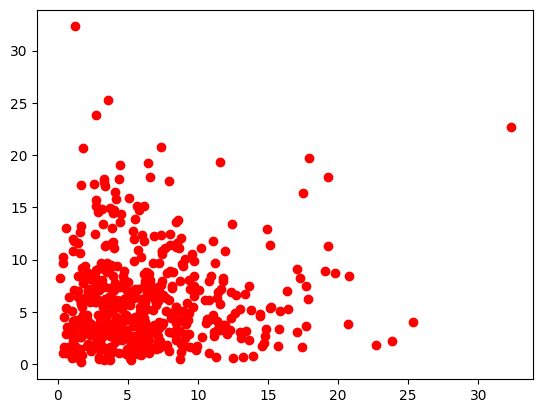

In [4]:
#plot scatter
datax=data
datay=data
x = np.delete(datax ,0)
y = np.delete(datay , N-1)

plt.scatter(x , y , c="red")
plt.show()

In [5]:
#find frequency table

def freq_count(data, l, u):
    count = 0
    for i in data:
        if l <= i < u:
            count += 1
    return count

In [6]:
#create intervals

upper = max(data)
lower = min(data)
interval_no = 10   #total no. of intervals
interval_size = round((upper - lower) / interval_no, 4)  #find size

freq_interval = {}

for x in range(interval_no):
    lower_interval = lower + x * interval_size
    upper_interval = lower_interval + interval_size
    interval_range = f"({round(lower_interval, 4)}-{round(upper_interval, 4)}]"
    freq_interval[interval_range] = freq_count(data, lower_interval, upper_interval)
    
if(round(upper_interval  , 4) <=  upper):
    freq_interval[list(freq_interval.keys())[-1]] += 1 
            

In [7]:

#print(freq_interval)
print("interval\t\tfreq")
for i ,j in freq_interval.items():
    print(i,"\t" , j)


interval		freq
(0.1564-3.3723] 	 152
(3.3723-6.5882] 	 161
(6.5882-9.8041] 	 103
(9.8041-13.02] 	 42
(13.02-16.2359] 	 21
(16.2359-19.4518] 	 14
(19.4518-22.6677] 	 4
(22.6677-25.8836] 	 2
(25.8836-29.0995] 	 0
(29.0995-32.3154] 	 1


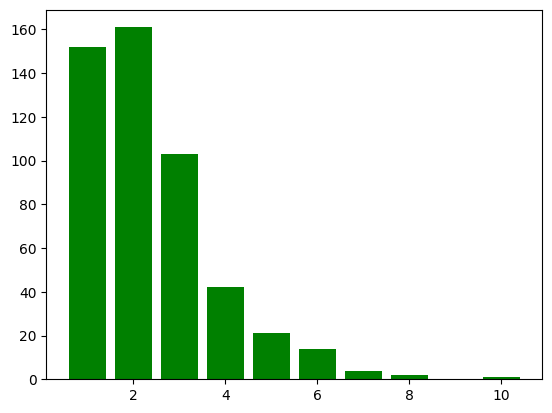

In [8]:
#plot hostrogram
# plotting the histogram
def plot_histogram(freq_interval , interval_no):
    x = [i for i in range(1, interval_no + 1)]
    y = list(freq_interval.values())
    plt.bar(x ,  y ,  color='g')
    plt.show()
    return None

#func call
plot_histogram(freq_interval, interval_no)

In [9]:
#find min and max 
a = min(data)
b = max(data)
print("a:" , a)
print("b:" , b)

a: 0.156449409989
b: 32.3155136736


In [10]:
interval = []
obs_freq = []

for i ,table in freq_interval.items():
    interval.append(i)
    obs_freq.append(table)
print("interval:" ,interval)
print("freq",obs_freq) 

interval: ['(0.1564-3.3723]', '(3.3723-6.5882]', '(6.5882-9.8041]', '(9.8041-13.02]', '(13.02-16.2359]', '(16.2359-19.4518]', '(19.4518-22.6677]', '(22.6677-25.8836]', '(25.8836-29.0995]', '(29.0995-32.3154]']
freq [152, 161, 103, 42, 21, 14, 4, 2, 0, 1]


In [11]:
#find mean  variance
mean = (a + b)/ 2
print("mean:" , mean)
#print(np.mean(data))


#variance-
var = (b -a)**2 /12   
print("variance:" , var)

mean: 16.2359815417945
variance: 86.18378452592185


In [24]:
#area under curve--
def AUC(fun , a , b , n):
    # height of each small trepezium
    h = abs(b-a)/n
    area = 0 # intilization of area as 0
    
    # calculating and sum of all small-small trapeziums
    for i in range(n):
        A = a + i * h
        B = a + (i + 1) * h
        area += (fun(A) + fun(B)) * h / 2 

    return area

#example---
#def fun(x):
 #  return x**2

#print(AUC(fun, 0, 1, 100))



0.33335


In [13]:
#pdf of uniform distribution
def pdf_uniform(x):
    return 1 / (b - a)


In [14]:
#cdf of uniform
def cdf_uniform(x):
    return (x - a) / (b - a)


In [15]:
#seperated upper and lower limit for each interval
l = []
u = []

for interval in interval:
    # Remove parentheses and split by '-'
    interval_values = interval.strip('()[]').split('-')
    
    # Convert the values to float and append to lower and upper limits lists
    l.append(float(interval_values[0]))
    u.append(float(interval_values[1]))

print("Lower Limits:", l)
print("Upper Limits:", u)


Lower Limits: [0.1564, 3.3723, 6.5882, 9.8041, 13.02, 16.2359, 19.4518, 22.6677, 25.8836, 29.0995]
Upper Limits: [3.3723, 6.5882, 9.8041, 13.02, 16.2359, 19.4518, 22.6677, 25.8836, 29.0995, 32.3154]


In [16]:
#find expected freq--
exp_freq = []

for i in range(len(l)):
    pdf_value = AUC(pdf_uniform, l[i], u[i], 100)
    exp_freq.append(pdf_value * N)

print("Expected Frequency:", exp_freq)


Expected Frequency: [49.99990008476221, 49.99990008476221, 49.99990008476221, 49.99990008476221, 49.99990008476221, 49.999900084762196, 49.99990008476221, 49.99990008476221, 49.999900084762196, 49.999900084762196]


In [17]:
#print("interval\tobs_freq\texp_freq")
#for i in range(len(upper_interval)):
#    print(upper_interval[i],"\t\t",obs_frq[i],"\t\t",exp_frq[i])

print("Lower".ljust(10), "Upper".ljust(10), "Obs_Freq".ljust(10), "Exp_Freq".ljust(10))
for i in range(len(l)):
    print(str(l[i]).ljust(10), str(u[i]).ljust(10), str(obs_freq[i]).ljust(10), str(exp_freq[i]).ljust(10))

Lower      Upper      Obs_Freq   Exp_Freq  
0.1564     3.3723     152        49.99990008476221
3.3723     6.5882     161        49.99990008476221
6.5882     9.8041     103        49.99990008476221
9.8041     13.02      42         49.99990008476221
13.02      16.2359    21         49.99990008476221
16.2359    19.4518    14         49.999900084762196
19.4518    22.6677    4          49.99990008476221
22.6677    25.8836    2          49.99990008476221
25.8836    29.0995    0          49.999900084762196
29.0995    32.3154    1          49.999900084762196


In [18]:
#merge table------------------------
L = []
U = []
O = []
E = []

i = 0
while i < len(exp_freq):
    if exp_freq[i] >= 5:
        L.append(l[i])
        U.append(u[i])
        O.append(obs_freq[i])
        E.append(exp_freq[i])
        i += 1
    else:
        sum_l = l[i]
        sum_u = u[i]
        sum_exp = exp_freq[i]
        sum_obs = obs_freq[i]
        i += 1
        while i < len(exp_freq) and sum_exp <= 5:
            sum_exp += exp_freq[i]
            sum_l = min(sum_l, l[i])
            sum_u = u[i]  # Update upper limit
            sum_obs += obs_freq[i]
            i += 1
        # Check if the last interval is merged
        if i == len(exp_freq):
            L[-1] = min(L[-1], sum_l)
            U[-1] = sum_u  # Update upper limit of the last merged interval
            O[-1] += sum_obs
            E[-1] += sum_exp
        else:
            L.append(sum_l)
            U.append(sum_u)
            O.append(sum_obs)
            E.append(sum_exp)

print("Lower".ljust(10), "Upper".ljust(10), "Obs_Freq".ljust(10), "Exp_Freq".ljust(10))
for i in range(len(L)):
    print(str(L[i]).ljust(10), str(U[i]).ljust(10), str(O[i]).ljust(10), str(E[i]).ljust(10))


Lower      Upper      Obs_Freq   Exp_Freq  
0.1564     3.3723     152        49.99990008476221
3.3723     6.5882     161        49.99990008476221
6.5882     9.8041     103        49.99990008476221
9.8041     13.02      42         49.99990008476221
13.02      16.2359    21         49.99990008476221
16.2359    19.4518    14         49.999900084762196
19.4518    22.6677    4          49.99990008476221
22.6677    25.8836    2          49.99990008476221
25.8836    29.0995    0          49.999900084762196
29.0995    32.3154    1          49.999900084762196


In [19]:
#apply chi square test-------------
# chi-sqr = (Oi - Ei)^2 / Ei  

def chi_sqr(E , O):
    return ((O - E)**2) / E

In [20]:
chi_test = []

for i in range(len(E)):
    chi = ((O[i] - E[i])**2) / E[i]
    chi_test.append(chi)
print(chi_test)

[208.080823463269, 246.4209360479839, 56.180324085912574, 1.2799705850948757, 16.819917709845377, 25.919907918132495, 42.31990072422101, 46.079900244626906, 49.99990008476219, 48.019900124728366]


In [21]:
# Display all values
print("Lower".ljust(10), "Upper".ljust(10), "Obs_Freq".ljust(10), "Exp_Freq".ljust(10), "\t\t" "Chi-Sq".ljust(10))
for i in range(len(L)):
    print(str(L[i]).ljust(10), str(U[i]).ljust(10), str(O[i]).ljust(10), str(E[i]).ljust(10), "\t", str(chi_test[i]).ljust(10))


Lower      Upper      Obs_Freq   Exp_Freq   		Chi-Sq  
0.1564     3.3723     152        49.99990008476221 	 208.080823463269
3.3723     6.5882     161        49.99990008476221 	 246.4209360479839
6.5882     9.8041     103        49.99990008476221 	 56.180324085912574
9.8041     13.02      42         49.99990008476221 	 1.2799705850948757
13.02      16.2359    21         49.99990008476221 	 16.819917709845377
16.2359    19.4518    14         49.999900084762196 	 25.919907918132495
19.4518    22.6677    4          49.99990008476221 	 42.31990072422101
22.6677    25.8836    2          49.99990008476221 	 46.079900244626906
25.8836    29.0995    0          49.999900084762196 	 49.99990008476219
29.0995    32.3154    1          49.999900084762196 	 48.019900124728366


In [22]:
#sumation  or chi-value
chi_value = sum(chi_test)
print("sum of chi_values is:" , chi_value)

sum of chi_values is: 741.1214809885766


In [23]:
# Calculate the degree of freedom  formula : No_of_intervals - No_of_parameters -1
#k = no. if intervals
#s = no. of parameters

No_of_intervals = len(L)
no_of_parameter = 2

DOF= No_of_intervals - no_of_parameter- 1

#value of alpha is--
significance_level=0.05   
print("Degree of freedom : ",DOF)

# calculate chi_squre_value
sum_chi_test = sum(chi_test)
print("chi srq value is calculates:",sum_chi_test)


# chi_square value in table on given significate level

chi_square_value_in_table = 14.067
print("chi-Square value in table : ",chi_square_value_in_table)

if sum_chi_test <= chi_square_value_in_table:
  print("Accepted Uniform distribution")
else:
  print("Rejected Uniform distribution")

Degree of freedom :  7
chi srq value is calculates: 741.1214809885766
chi-Square value in table :  14.067
Rejected Uniform distribution
